In [1]:
import numpy as np
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



marketing=pd.read_csv('marketing_campaign.csv',sep=';')
marketing.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09/09/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13/11/2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08/05/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06/06/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13/03/2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [5]:
###################################### Exploration de données #########################
### nbr_lignes_colonnees
print('nbr_ligne :',marketing.shape[0])
print('nbr_colonne :',marketing.shape[1])

### types_variables 
print("")
print("type variables")
print(marketing.dtypes.value_counts())
print("")

var_cat=[]
for col in marketing.select_dtypes('object'):
    var_cat.append(col)
    
var_int=[]
for col in marketing.select_dtypes('int64'):
    var_int.append(col)

var_float=[]
for col in marketing.select_dtypes('float64'):
    var_float.append(col)
    
print("variables de type objet =>",var_cat)
print("")
print("variables de type int =>",var_int)
print("")
print("variables de type float =>",var_float)

nbr_ligne : 2240
nbr_colonne : 29

type variables
int64      25
object      3
float64     1
dtype: int64

variables de type objet => ['Education', 'Marital_Status', 'Dt_Customer']

variables de type int => ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

variables de type float => ['Income']


,pourcentage Nan
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,0.010714
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000


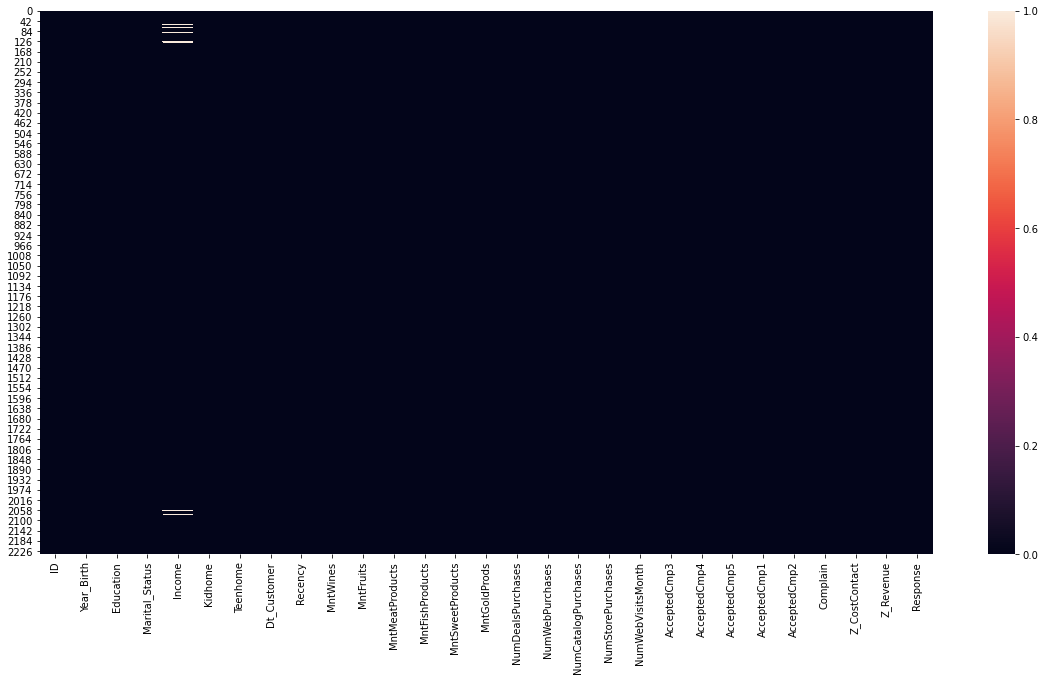

In [11]:
#visualisation de jeu de donnees 
plt.figure(figsize=(20,10))
sns.heatmap(marketing.isna())

##valeures manquentes 
valeur_manquantes=marketing.isna().sum()/marketing.shape[0]
val_nan=pd.DataFrame({"pourcentage Nan":valeur_manquantes})
val_nan


In [16]:
marketing['Dt_Customer']=pd.to_datetime(marketing['Dt_Customer'])
marketing['anciente']=pd.Timestamp.now().year-marketing['Dt_Customer'].dt.year
marketing['anciente']

0       10
1        8
2        9
3        8
4        8
        ..
2235     9
2236     8
2237     8
2238     8
2239    10
Name: anciente, Length: 2240, dtype: int64

Education----------------------------------------- ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status------------------------------------ ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
 


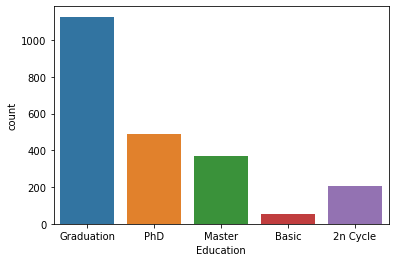

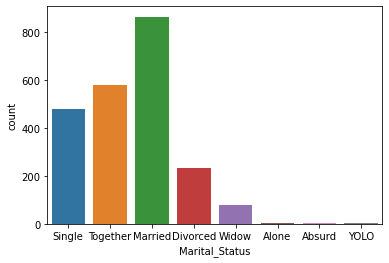

In [20]:
import warnings
warnings.filterwarnings("ignore")

########################### Analyse de fond #############################
## variables type objets ##
for col in marketing.select_dtypes('object'):
    print (f'{col :-<50} {marketing[col].unique()}')
    

print(" ")
for col in marketing.select_dtypes('object'):
    plt.figure()
    sns.countplot(col,data=marketing)
    

revenue moyen =>  52247.25135379061
revenue median =>  51381.5
revenue max =>  666666.0
revenue min =>  1730.0


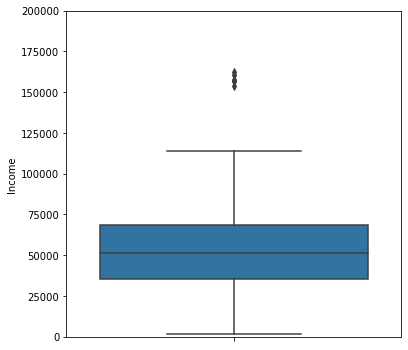

In [39]:
## variable de type objet
for col in marketing.select_dtypes('float64'):
    fig, axes = plt.subplots(figsize=(6,6)) 
    axes.set_ylim(0,200000) 
    sns.boxplot(y=marketing[col])

print("revenue moyen => ",marketing['Income'].mean())
print("revenue median => ", marketing['Income'].median())
print("revenue max => ", marketing['Income'].max())
print("revenue min => ", marketing['Income'].min())


montant moyen des achats NumDealsPurchases  =>  2.325
montant moyen des achats NumWebPurchases  =>  4.084821428571429
montant moyen des achats NumCatalogPurchases  =>  2.6620535714285714
montant moyen des achats NumStorePurchases  =>  5.790178571428571

montant moyen des depenses par type produit MntWines  =>  303.9357142857143
montant moyen des depenses par type produit MntFruits  =>  26.302232142857143
montant moyen des depenses par type produit MntMeatProducts  =>  166.95
montant moyen des depenses par type produit MntFishProducts  =>  37.52544642857143
montant moyen des depenses par type produit MntSweetProducts  =>  27.06294642857143
montant moyen des depenses par type produit MntGoldProds  =>  44.021875



<Figure size 432x288 with 0 Axes>

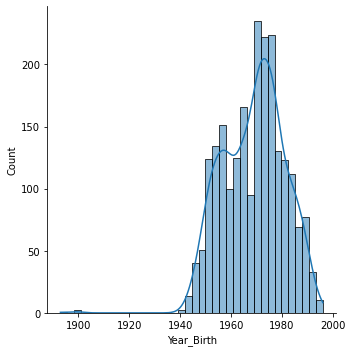

<Figure size 432x288 with 0 Axes>

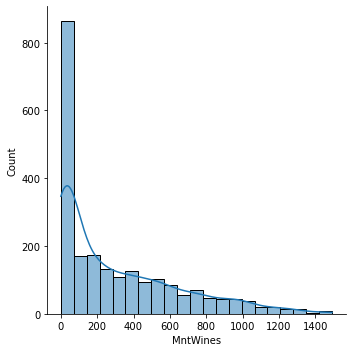

<Figure size 432x288 with 0 Axes>

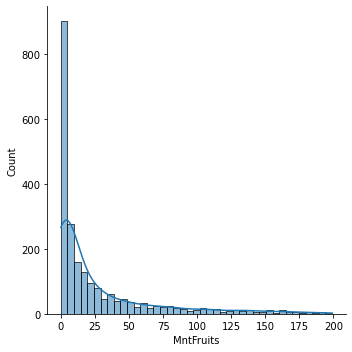

<Figure size 432x288 with 0 Axes>

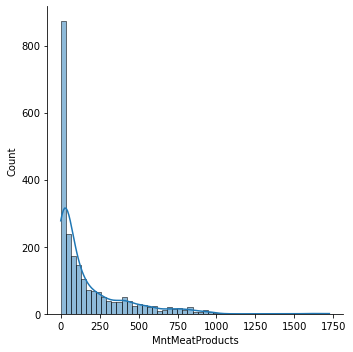

<Figure size 432x288 with 0 Axes>

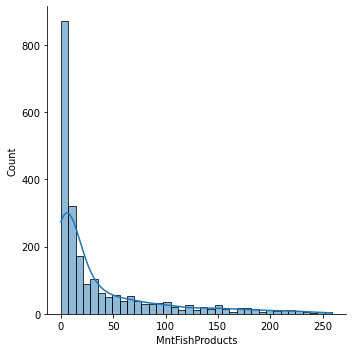

<Figure size 432x288 with 0 Axes>

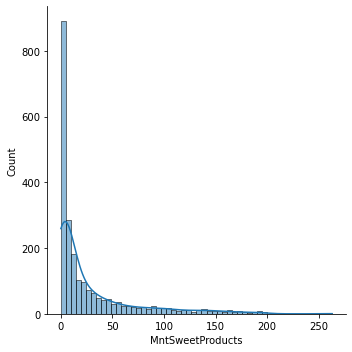

<Figure size 432x288 with 0 Axes>

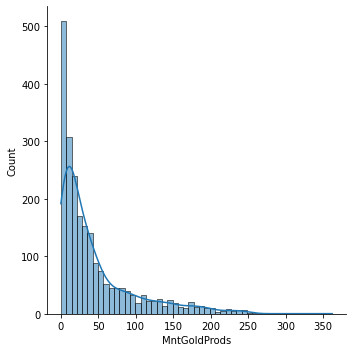

<Figure size 432x288 with 0 Axes>

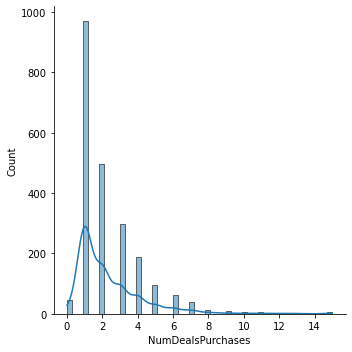

<Figure size 432x288 with 0 Axes>

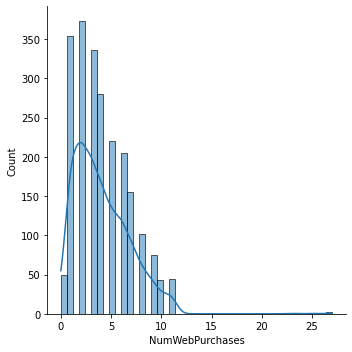

<Figure size 432x288 with 0 Axes>

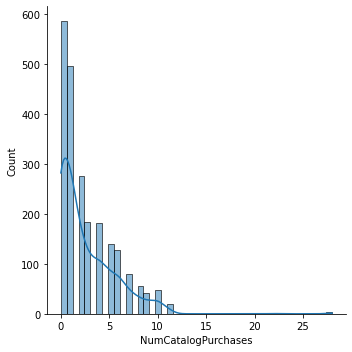

<Figure size 432x288 with 0 Axes>

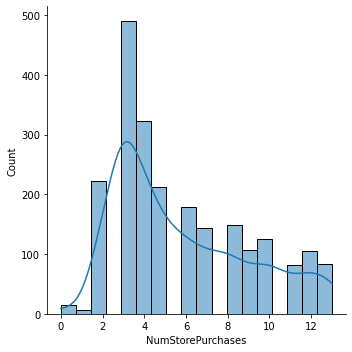

In [58]:
## variable de type int
liste1=['Year_Birth', 'MntWines', 'MntFruits', 
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


prod=['MntWines', 'MntFruits', 
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

achats=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

for col in achats:
    print("montant moyen des achats",col," => ",marketing[col].mean())

print("")
for col in prod:
    print("montant moyen des depenses par type produit",col," => ",marketing[col].mean())

print("")
for col in liste1:
    plt.figure()
    sns.displot(marketing[col],kde=True)



pourcentage de plainte portees 0.009375 %
 


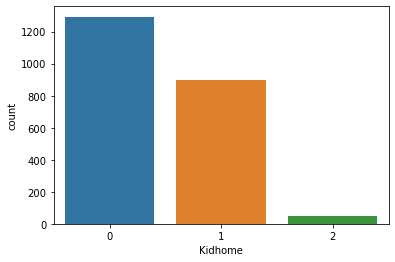

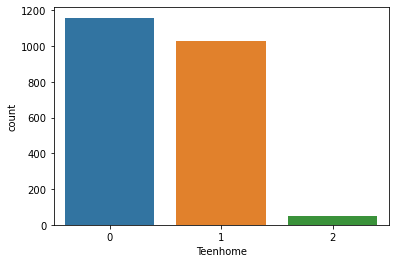

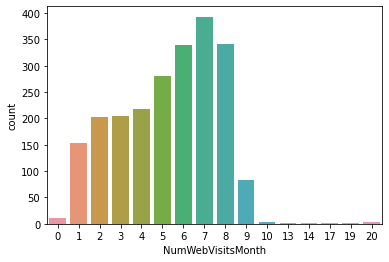

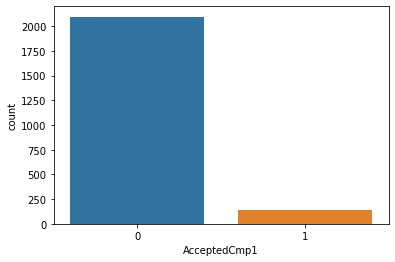

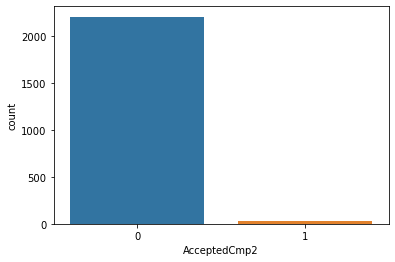

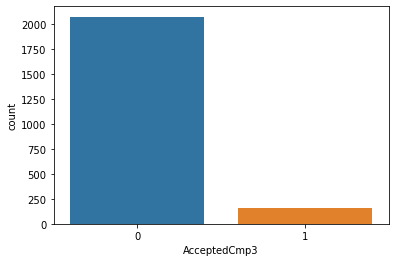

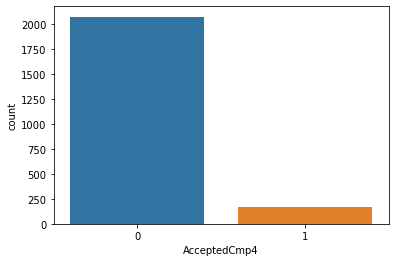

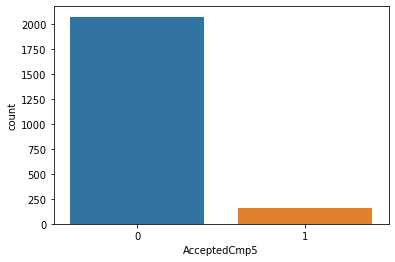

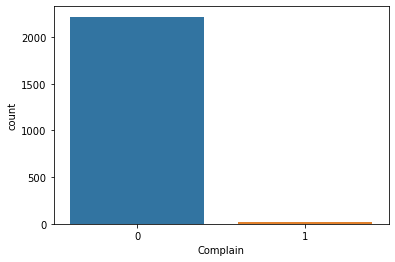

In [74]:
liste2=['Kidhome', 'Teenhome','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain']

for col in liste2:
    plt.figure()
    sns.countplot(marketing[col])
    
marke=marketing[marketing['Complain']==1]
plain=marke.shape[0]/marketing.shape[0]
print("pourcentage de plainte portees",plain,'%')
print(" ")

<AxesSubplot:>

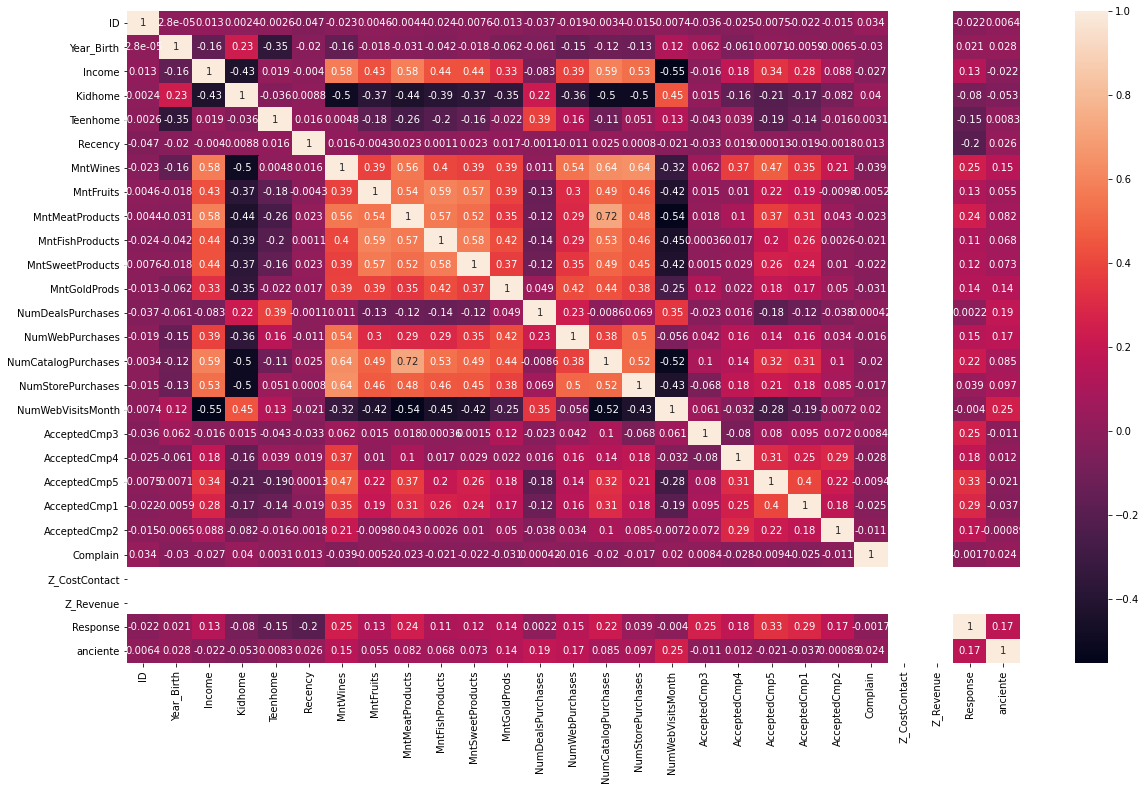

In [82]:
## coorelation ##
plt.figure(figsize=(20,12))
sns.heatmap(marketing.corr(),annot=True)


In [83]:
###################### preprocessing #################
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.cluster import KMeans,DBSCAN,AffinityPropagation
from sklearn.metrics import *
from sklearn.metrics.cluster import contingency_matrix
from sklearn.mixture import *



marketing2=marketing.copy()
def Imputer(data):
    data1=data.drop(['ID','Z_CostContact','Z_Revenue','Dt_Customer'],axis=1)
    data1.dropna(axis=0,inplace=True)
    return data1


def Encodage(data):
    codage={'Single':0,
          'Together':1,
          'Married':2,
          'Divorced':3,
          'Widow':4,
          'Alone':5,
          'Absurd':6,
          'YOLO':7,
          'Graduation':0,
          'PhD':1,
          'Master':2,
          'Basic':3,
          '2n Cycle':4
            }
    for col in data.select_dtypes('object'):
        data[col]=data[col].map(codage)
    
    return data

def standardiser(data):
    transformer=StandardScaler()
    transformer.fit(data)
    data1=transformer.transform(data)
    data2=pd.DataFrame(data1,columns=data.columns)
    
    return data2
    
def Modele(data):
    data=Imputer(data)
    data=Encodage(data)
    data=standardiser(data)
    
    #x=data.drop('Dt_Customer',axis=1)
    
    return data

dataset=Modele(marketing)
print("Shape Data=>",dataset.shape)

Shape Data=> (2216, 26)


In [84]:
dataset1=dataset.iloc[0:80,:]

[0.26371738 0.10279711 0.0879597  0.0718733  0.05758818 0.05263697]


Text(0, 0.5, 'variance expliquee cumulee')

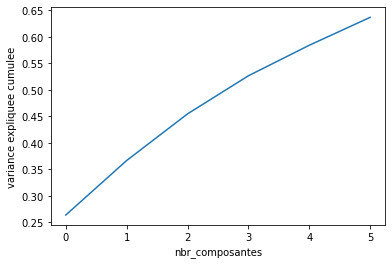

In [87]:
from sklearn.decomposition import *

app_pca =PCA(n_components=6)
app_pca.fit(dataset1)
##variance expliquees ##
print(app_pca.explained_variance_ratio_)
plt.figure()
plt.plot(np.cumsum(app_pca.explained_variance_ratio_))
plt.xlabel('nbr_composantes')
plt.ylabel('variance expliquee cumulee')

[7.04555334 2.74635876 2.34995796 1.92018881 1.53854317 1.40626525]


Text(0.5, 0, 'nbr_composantes')

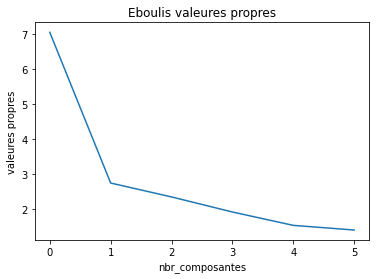

In [88]:
##valeures propres ##
print("valeures propres => ",app_pca.explained_variance_)
plt.figure()
plt.plot(app_pca.explained_variance_)
plt.title("Eboulis valeures propres") 
plt.ylabel("valeures propres") 
plt.xlabel("nbr_composantes") 

[-2.36568878 -0.05295304 -0.60296681 -0.04880566 -0.7415939   0.7075845 ]


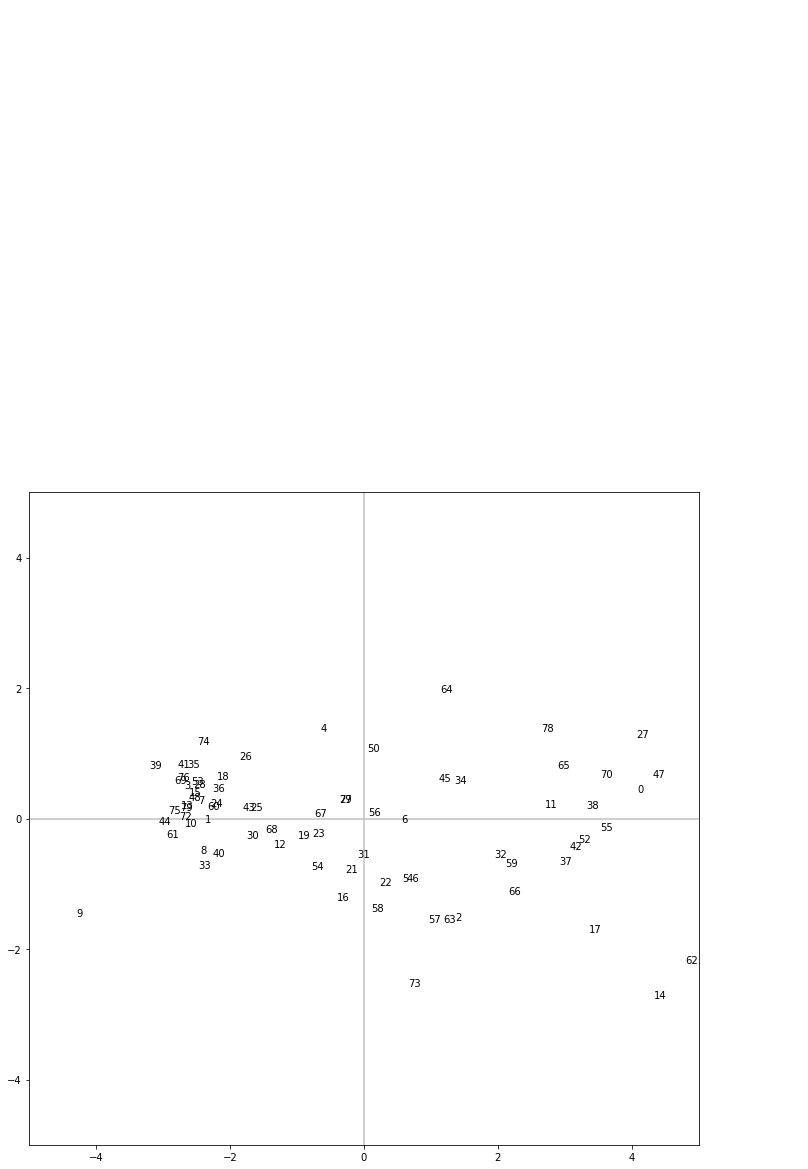

In [96]:
## representation des individus ##
vect = app_pca.fit_transform(dataset1)
print(vect[1])
fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-5,5) 
axes.set_ylim(-5,5)

for i in range(dataset1.shape[0]): 
    plt.annotate(dataset1.index[i],(vect[i,0],vect[i,1]))
    
plt.plot([-5,5],[0,0],color='silver')
plt.plot([0,0],[-5,5],color='silver') 
plt.show()

In [103]:
## contributions individus 
contribution = vect**2 
for j in range(app_pca.n_components): 
    contribution[:,j] = contribution[:,j]/(dataset1.shape[0]*app_pca.explained_variance_[j]) 
pd.DataFrame({'id':dataset1.index,'contribution_1':contribution[:,0],'contriution_2':contribution[:,1]})

,id,contribution_1,contriution_2
0,0,0.029569,0.000719
1,1,0.009929,0.000013
2,2,0.003325,0.011027
3,3,0.012689,0.001011
4,4,0.000734,0.008100
...,...,...,...
75,75,0.015065,0.000031
76,76,0.013805,0.001615
77,77,0.000244,0.000282
78,78,0.012409,0.008249


In [106]:
distance = np.sum(dataset1**2,axis=1) 
pd.DataFrame({'carres_distance':distance})

,carres_distance
0,37.860632
1,14.773092
2,11.038508
3,13.055737
4,10.976824
...,...
75,14.253689
76,16.251826
77,8.316348
78,29.159447


In [107]:
cos2 = vect**2 
for j in range(app_pca.n_components):
    cos2[:,j] = cos2[:,j]/distance 
pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})

,COS2_1,COS2_2
0,0.440208,0.004170
1,0.378830,0.000190
2,0.169770,0.219481
3,0.547825,0.017019
4,0.037679,0.162119
...,...,...
75,0.595740,0.000483
76,0.478784,0.021827
77,0.016534,0.007457
78,0.239872,0.062154


6


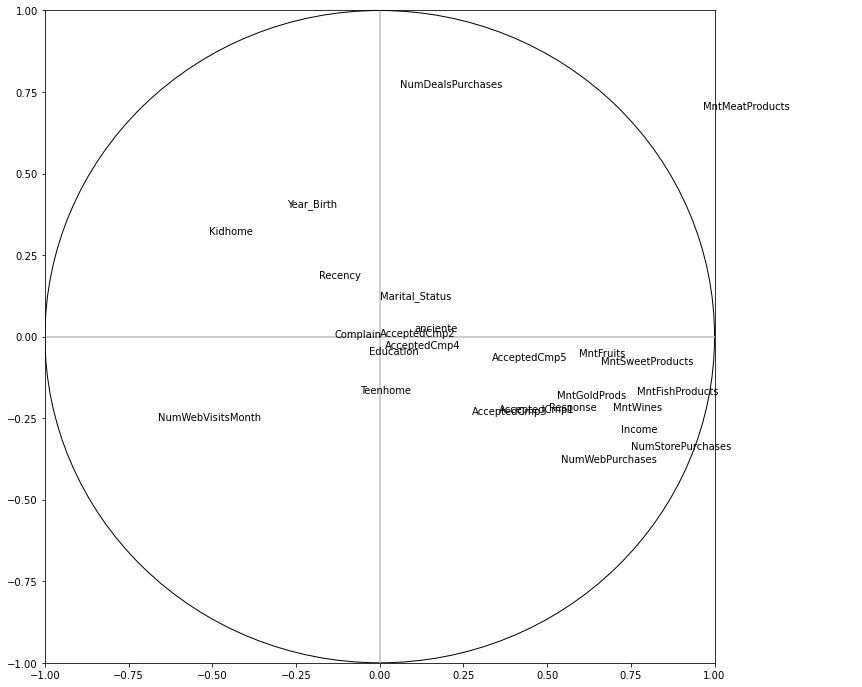

In [110]:
print(len(app_pca.components_)) # vecteures propres 
cov = np.zeros((dataset1.shape[1],dataset1.shape[1])) 
for k in range(6): 
    cov[:,k] = app_pca.components_[k,:] * np.sqrt(app_pca.explained_variance_)[k]
#print(corvar)
fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-1,1) 
axes.set_ylim(-1,1)
for j in range(dataset1.shape[1]): 
    plt.annotate(dataset1.columns[j],(cov[j,0],cov[j,1]))
    
plt.plot([-1,1],[0,0],color='silver')
plt.plot([0,0],[-1,1],color='silver')

cercle = plt.Circle((0,0),1,color='black',fill=False) 
axes.add_artist(cercle)
plt.show()